# Effective Graph Paper
Code to generate "SI Figure - Spreading bio-random comparison"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [14]:
dfB = pd.read_csv('../Figure 2/BioNetworkEdgeEffectiveness.csv')

In [15]:
dfBR = pd.read_csv('../Figure 2/BioNetworkRandomEnsembleEdgeEffectiveness.csv.gz', index_col=0)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Plotting k:2
loading files
ploting
Plotting k:3
loading files
ploting
Plotting k:4
loading files
ploting
Plotting k:5
loading files
ploting
Plotting k:6
loading files
ploting
Plotting k:7
loading files
ploting


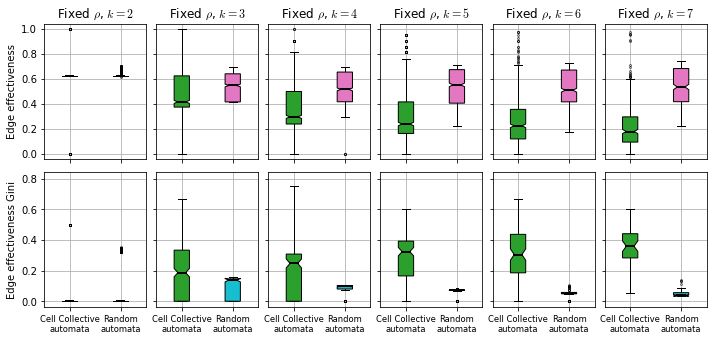

In [28]:
"""
fig = plt.figure(constrained_layout=False, figsize=(8.5,11))
gs = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
#
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[0, 3])
ax8 = fig.add_subplot(gs[1, 3])
axes = [(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)]
"""
fig, axes = plt.subplots(figsize=(10.0,4.8), ncols=6, nrows=2)
#
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', markeredgewidth=.5, rasterized=True)
medianprops = dict(color='black')
path = '../Figure 2/data/'

for idx, degree in enumerate([2, 3, 4, 5, 6, 7], start=0):
#
    print('Plotting k:{k:d}'.format(k=degree))
    
    print('loading files')
    bfile = 'BioNetworkEffectivenessK{k:d}.tsv'.format(k=degree)
    bgfile = 'BioNetworkEffectivenessGiniK{k:d}.tsv'.format(k=degree)
    mfile = 'MatchedBioNetworkEffectivenessK{k:d}.tsv'.format(k=degree)
    mgfile = 'MatchedBioNetworkEffectivenessGiniK{k:d}.tsv'.format(k=degree)
    #
    dfB = pd.read_csv(path + bfile, sep='\t')
    dfBG = pd.read_csv(path + bgfile, sep='\t')
    dfM = pd.read_csv(path + mfile, sep='\t')
    dfMG = pd.read_csv(path + mgfile, sep='\t')
    #
    dfMg = dfM.groupby(['Boolean Network', 'Node', 'Input']).agg({'Input Effectiveness':['mean', 'std']})
    dfMGg = dfMG.groupby(['Boolean Network', 'Node']).agg({'Input Effectiveness Gini':['mean', 'std']})
    #
    print('ploting')
    axt = axes[0][idx]
    axb = axes[1][idx]
    #
    res = axt.boxplot([dfB['Input Effectiveness'], dfMg[('Input Effectiveness', 'mean')]], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

    colors = ['#2ca02c', '#e377c2']
    for box, median, color in zip(res['boxes'], res['medians'], colors):
        box.set_facecolor(color)
        median.set_c('k')
        median.set_lw(2)


    axt.set_xticks(range(1,3))
    axt.set_xticklabels([]) #'Cell Collective\nautomata', 'Random\nautomata'])
    axt.set_title(r"Fixed $\rho$, $k={k:d}$".format(k=degree))
    axt.grid()
    axt.set_ylim(-0.04, 1.04)


    res = axb.boxplot([dfBG['Input Effectiveness Gini'], dfMGg[('Input Effectiveness Gini', 'mean')]], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

    colors = ['#2ca02c', '#17becf']
    for box, median, color in zip(res['boxes'], res['medians'], colors):
        box.set_facecolor(color)
        median.set_c('k')
        median.set_lw(2)

    if idx > 0:
        axt.set_yticklabels([])
        axb.set_yticklabels([])
    axb.set_xticks(range(1,3))
    axb.set_xticklabels(['Cell Collective\nautomata', 'Random\nautomata'], fontsize='small')
    #axb.set_title(r"Fixed bias with hard constraint and $k>1$")
    axb.grid()
    axb.set_ylim(-0.04,0.84)

#
axes[0][0].set_ylabel('Edge effectiveness')
axes[1][0].set_ylabel('Edge effectiveness Gini')
#
plt.subplots_adjust(left=0.06, right=0.98, bottom=0.10, top=0.92, wspace=0.1, hspace=0.1)
plt.savefig("EdgeEffectivenessMultipleK.pdf", dpi=300)
plt.show()